# Data Product Arquitecture - Food Inspections Project

Team:

* Jóse Roberto Pérez - 173013
* Santiago Battezzati - 197727
* Carlos Geovany Pérez - 197614
* Mariana Lugo - 118626

## Imports

#### Standard library imports

In [1]:
import os
import sys
from datetime import datetime

#### Third party imports

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
pd.options.display.max_columns = 25

import matplotlib.pyplot as plt
import seaborn as sns

#### Local application imports

In [3]:
sys.path.append("../")

In [4]:
%reload_ext autoreload
%autoreload 2

from src.utils.utils import *

---

## Importing and cleaning data
Food Inspections in Chicago: https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5

In [5]:
df = pd.read_csv('../data/raw/Food_Inspections.csv')
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2453552,CLAMP DOWN BURGERS,NaN,2749943.0,NaN,Risk 2 (Medium),1742 W DIVISION ST,CHICAGO,IL,60622.0,10/20/2020,License,No Entry,NaN,41.903387,-87.671740,"(-87.67174026586648, 41.903386755553484)"
1,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
2,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
3,2386464,Uni Sushi Bristo,Uni Sushi Bistro,2262637.0,Restaurant,Risk 1 (High),1752 W NORTH AVE,CHICAGO,IL,60622.0,08/25/2020,Complaint,No Entry,NaN,41.910676,-87.672205,"(-87.67220465807979, 41.91067561170382)"
4,2386398,KIKI'S BISTRO,KIKI'S BISTRO,22899.0,Restaurant,Risk 1 (High),900 N FRANKLIN ST,CHICAGO,IL,60610.0,08/24/2020,Canvass,No Entry,NaN,41.898998,-87.635921,"(-87.63592067312285, 41.89899799424835)"


**Limpieza de nombres de las columnas:**

In [6]:
clean_col_names(df)

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,2453552,CLAMP DOWN BURGERS,NaN,2749943.0,NaN,Risk 2 (Medium),1742 W DIVISION ST,CHICAGO,IL,60622.0,10/20/2020,License,No Entry,NaN,41.903387,-87.671740,"(-87.67174026586648, 41.903386755553484)"
1,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
2,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
3,2386464,Uni Sushi Bristo,Uni Sushi Bistro,2262637.0,Restaurant,Risk 1 (High),1752 W NORTH AVE,CHICAGO,IL,60622.0,08/25/2020,Complaint,No Entry,NaN,41.910676,-87.672205,"(-87.67220465807979, 41.91067561170382)"
4,2386398,KIKI'S BISTRO,KIKI'S BISTRO,22899.0,Restaurant,Risk 1 (High),900 N FRANKLIN ST,CHICAGO,IL,60610.0,08/24/2020,Canvass,No Entry,NaN,41.898998,-87.635921,"(-87.63592067312285, 41.89899799424835)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215062,229233,"ZULLO'S MARKETS, LLC",ZULLO'S MARKET,2016915.0,Restaurant,Risk 2 (Medium),131 N Clinton ST,CHICAGO,IL,60661.0,02/18/2010,License,Fail,NaN,41.884188,-87.641120,"(-87.64111966683218, 41.884187507127805)"
215063,68205,LA FONDA CHIQUITA TLC,LA FONDA CHIQUITA,2017215.0,Restaurant,Risk 1 (High),5940 W DIVERSEY AVE,CHICAGO,IL,60639.0,02/09/2010,License,Fail,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,41.931260,-87.775203,"(-87.77520287598688, 41.93125971874477)"
215064,88234,KABAB CUISINE 2,KABAB CUISINE 2,2014076.0,Restaurant,Risk 1 (High),6320 N LINCOLN AVE,CHICAGO,IL,60659.0,02/01/2010,License Re-Inspection,Pass,NaN,41.996139,-87.716968,"(-87.71696834498202, 41.996139331170895)"
215065,74311,MARGARITA DISTRIBUTORS,NaN,2017298.0,Wholesale,Risk 3 (Low),2332 S BLUE ISLAND AVE BLDG,CHICAGO,IL,60608.0,02/19/2010,License Re-Inspection,Pass,NaN,41.849940,-87.672421,"(-87.67242100722251, 41.84994008002549)"


### Exploración de variables

**Número de variables:**

In [ ]:
count_vars(df)

**Número de observaciones:**

In [ ]:
count_obs(df)

**¿Qué variables son?**

In [ ]:
count_unique_obs(df)

In [ ]:
cat_vars=['dba_name','aka_name','facility_type','risk','address','city','state','inspection_type',
          'results','violations']
data_profiling_categ(df, cat_vars)

### Análisis de texto
Issue #13 GitHub

#### 1. Limpieza de campo `facility_type`

In [7]:
print(len(df["facility_type"].unique()))
df["facility_type"].unique()

501


array([nan, 'Restaurant', "Children's Services Facility", 'Grocery Store',
       'GAS STATION', 'Bakery', 'Long Term Care', 'Mobile Food Preparer',
       'School', 'Golden Diner', 'HOSTEL', 'school cafeteria',
       'Daycare (2 - 6 Years)', 'Daycare Above and Under 2 Years',
       'Hospital', 'Pop-Up Establishment Host-Tier II', 'Catering',
       'BREWERY', 'Liquor', 'TAVERN', 'Daycare Combo 1586',
       'Mobile Food Dispenser', 'SCHOOL', 'VENDING COMMISSARY',
       'Shared Kitchen User (Long Term)', 'COFFEE SHOP', 'Shared Kitchen',
       'LIQUOR/COFFEE KIOSK', 'SUPPORTIVE LIVING',
       'Daycare (Under 2 Years)', 'Mobile Prepared Food Vendor',
       'meat packing', 'CHARTER SCHOOL', 'PRIVATE SCHOOL',
       'Mobile Frozen Desserts Vendor', 'GROCERY STORE/COOKING SCHOOL',
       'CHURCH (SPECIAL EVENTS)', 'Special Event', 'STADIUM', 'Wholesale',
       'RESTAURANT/GROCERY STORE', 'bar', 'DISTRIBUTION CENTER',
       'Wrigley Roof Top', 'DAYCARE', 'PREPACAKAGED FOODS',
       

In [8]:
dfx = df["facility_type"].value_counts().to_frame()
dfx

,facility_type
Restaurant,143207
Grocery Store,28084
School,13206
Children's Services Facility,3707
Bakery,3153
...,...
SPA,1
HERBAL,1
HEALTH CENTER/NUTRITION CLASSES,1
LAUNDROMAT,1


/Users/rp_mbp/Documents/ReposRob_RobPer/ITAMmcd/semestre_2/Arquitectura_Prod_Dat/Venv_ArqPD/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


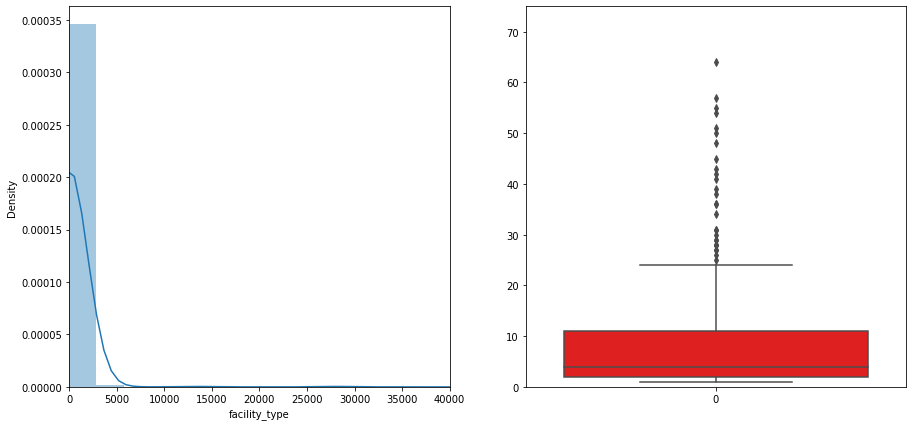

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))


## Distplot
ax[0].set(xlim=(0, 40e3))
sns.distplot(dfx["facility_type"], ax=ax[0])

## Boxplot
ax[1].set(ylim=(0, 75))
sns.boxplot(data=dfx["facility_type"], color="red", ax=ax[1])


plt.show()

In [10]:
df["facility_type"].fillna("nan", inplace=True)

df["facility_type"] = df["facility_type"].apply(lambda x: clean_txt(x))

In [11]:
print(len(df["facility_type"].unique()))
df["facility_type"].value_counts()

448


restaurant                                         143207
grocery_store                                       28088
school                                              13219
nan                                                  4889
children-s_services_facility                         3707
                                                    ...  
day_spa                                                 1
mobile_frozen_desserts_dispenser-non-_motorized         1
coffee_roaster                                          1
catered_liquor                                          1
greenhouse                                              1
Name: facility_type, Length: 448, dtype: int64

In [12]:
dfx = df["facility_type"].value_counts().to_frame()
dfx

,facility_type
restaurant,143207
grocery_store,28088
school,13219
nan,4889
children-s_services_facility,3707
...,...
day_spa,1
mobile_frozen_desserts_dispenser-non-_motorized,1
coffee_roaster,1
catered_liquor,1


/Users/rp_mbp/Documents/ReposRob_RobPer/ITAMmcd/semestre_2/Arquitectura_Prod_Dat/Venv_ArqPD/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


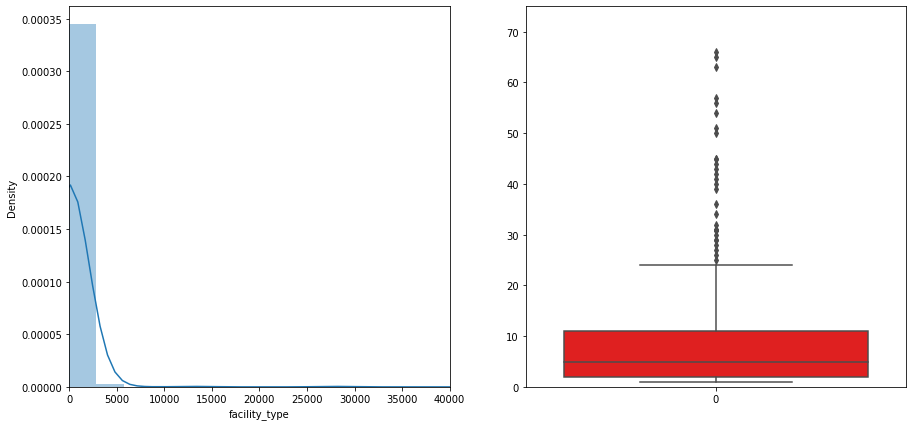

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))


## Distplot
ax[0].set(xlim=(0, 40e3))
sns.distplot(dfx["facility_type"], ax=ax[0])

## Boxplot
ax[1].set(ylim=(0, 75))
sns.boxplot(data=dfx["facility_type"], color="red", ax=ax[1])


plt.show()

In [15]:
# mr1 = dfx["facility_type"] <= 1
mr2 = dfx.index.str.contains("rest")
dfx.loc[(mr2), :][:50]

,facility_type
restaurant,143207
grocery-restaurant,57
restaurant-bar,41
grocery_-_restaurant,29
restaurant-grocery_store,27
gas_station-restaurant,15
grocery-_restaurant,13
restaurant-hospital,11
restuarant_and_bar,9
grocery_store-_restaurant,9


In [16]:
mr1 = df["facility_type"].str.contains("day")
df.loc[mr1, ["facility_type"]]

,facility_type
146,daycare_-2_-_6_years-
148,daycare_above_and_under_2_years
156,daycare_-2_-_6_years-
217,daycare_-2_-_6_years-
240,daycare_above_and_under_2_years
...,...
214998,daycare_-2_-_6_years-
214999,daycare_-2_-_6_years-
215023,daycare_-2_-_6_years-
215045,daycare_-2_-_6_years-


**Notas de análisis:**
- @9/Feb/2020
    - Una vez limpiados los textos, la cantidad de únicos pasó de 501 a 448.
    - Tal vez podríamos agrupar las categorías por aparición de palabras clave (e.g. `daycare` OR `day_care`).
    - Todas las que caigan fuera de las categorías, serán incluidas en una reserva llamada "Otros"
    - Podría valer la pena hacer un análisis de clústering para agrupar palabras por similitudes y así definir las categorías. (tal vez va a ser difícil hacer estas asociaciones.)

#### 2. Limpieza de campo `inspection_date`

#### 3. Limpieza de campo `violations`

---

## 1. ¿Cuáles son los tipos 10 de establecimientos que más violaciones cometen? (Facility Type)


In [ ]:
conteos_ft=df.groupby(["results","facility_type"]).size().reset_index(name="counts")
conteos_ft=conteos_ft.pivot("facility_type","results","counts")
conteos_ft=conteos_ft.fillna(0)
conteos_ft['Total']=conteos_ft.sum(1)
conteos_ft =conteos_ft.sort_values('Fail',ascending=False)
conteos_ft

In [ ]:
n = 10
top10=df['facility_type'].value_counts()[:10].sort_values(ascending=False)
top10

Se muestra el porcentaje del tipo de establecimiento acuerdo con el resultado de la inspección:

In [ ]:
proporciones_ft=round(conteos_ft.iloc[:,0:7].apply(lambda x: x/x.sum()*100, axis=1),2)
proporciones_ft=proporciones_ft.sort_values('Fail',ascending=False)
proporciones_ft

## 2. ¿Qué tipo de inspección detecta más establecimientos fuera de regla? (Inspection Type)

In [ ]:
conteos_it=df.groupby(["results","inspection_type"]).size().reset_index(name="counts")
conteos_it=conteos_it.pivot("inspection_type","results","counts")
conteos_it=conteos_it.fillna(0)
conteos_it['Total']=conteos_it.sum(1)
conteos_it =conteos_it.sort_values('Fail',ascending=False)
conteos_it

Se muestra el porcentaje del tipo de inspección de acuerdo con los resultados:

In [ ]:
proporciones_it=round(conteos_it.iloc[:,0:7].apply(lambda x: x/x.sum()*100, axis=1),2)
proporciones_it=proporciones_it.sort_values('Fail',ascending=False)
proporciones_it

Se muestra el top 20 de tipos de inspección con un porcentaje mayor de inspecciones no reprobadas.

In [ ]:
top20=proporciones_it.iloc[0:19,:]
top20

## 3. Relación entre el riesgo y resultado, ¿los más riesgosos no pasan la insepección?

In [ ]:
rr=df.groupby(['results','risk']).size().reset_index(name="counts")
rr=rr.pivot("results", "risk","counts")
rr=rr.fillna(0)
rr['Total']=rr.sum(1)
rr =rr.sort_values('Risk 1 (High)',ascending=False)
rr

In [ ]:
prop=round(rr.iloc[:,0:4].apply(lambda x: x/x.sum()*100, axis=1),2)
prop

In [ ]:
prop.plot(kind='bar',stacked=True)

## 4. ¿Cómo es el comportamiento de las inspecciones en el tiempo?

Se separa inspection_date en tres diferentes columnas: day, month, year y las agrega al dataframe:

In [ ]:
fecha= df.inspection_date.str.split("/", n=2,expand=True)
df['day']=fecha[1]
df['month']=fecha[0]
df['year']=fecha[2]

In [ ]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'])

In [ ]:
# Columnas de year, month y counts
fecha_separated = df.groupby(['year','month']).size().reset_index(name="conteos")
# Hacemos tabla donde las columnas son años y las filas mes 
fecha_separated_p = fecha_separated.pivot("month", "year","conteos")
# Graficamos 
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set3')
h =sns.lineplot(data=fecha_separated_p,linewidth = 3,dashes=False)
plt.legend(fontsize='x-large', title_fontsize='40',loc='lower right')
h.set(xlabel='Meses',ylabel='Conteos de Inspecciones')
plt.show()

## 5. ¿Cómo es el comportamiento por tipo de resultados en el tiempo?

In [ ]:
fecha_separated2 = df.groupby(['year','month','results']).size().reset_index(name="counts")
fecha_separated2['date']= fecha_separated2['year']+'-'+fecha_separated2['month']
g=fecha_separated2.drop(['year','month'],1)
g=g.set_index('date')
sns.set(style='whitegrid',rc={'figure.figsize':(20,10)},palette='Set2')
sns.lineplot(x='date',y='counts',hue='results',data=g,linewidth = 2)
plt.xticks(rotation= 90,size=8)
plt.show()

Se muestra el comportamiento anterior en porcentaje de inspecciones:

In [ ]:
g2=fecha_separated2.drop(['year','month'],1)
g2=g2.pivot("date", "results","counts")
g2=g2.fillna(0)
g2['total']=g2.sum(1)
prop2=round(g2.iloc[:,0:5].apply(lambda x: x/x.sum()*100, axis=1),2)
sns.set(style='whitegrid',rc={'figure.figsize':(20,10)},palette='Set2')
h =sns.lineplot(data=prop2,linewidth = 2,dashes=False,marker='o')
plt.xticks(rotation= 90)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

## 6. ¿Es importante la temporalidad de año, mes y día para las inspecciones?

Con variable inspection_date en formato tiempo creamos conteos del número de inspecciones hechas por día:

In [ ]:
conteos_fechas = df.groupby(['inspection_date']).size().reset_index(name='conteos')
# hacemos que inspection_date sea el identificador de las filas
conteos_fechas = conteos_fechas.set_index('inspection_date')


In [ ]:
# Separamos los días, meses, años
conteos_fechas.insert(1, 'year', conteos_fechas.index.year)
conteos_fechas.insert(2, 'month', conteos_fechas.index.month)
conteos_fechas.insert(3, 'day', conteos_fechas.index.day)
conteos_fechas = conteos_fechas.copy()

In [ ]:
# Graficamos
fig, axs = plt.subplots(figsize=(30,20),ncols=6, nrows=2)
heatmaps(conteos_fechas,2010,axs[0][0],'no','Day')
heatmaps(conteos_fechas,2011,axs[0][1],'no','')
heatmaps(conteos_fechas,2012,axs[0][2],'no','')
heatmaps(conteos_fechas,2013,axs[0][3],'no','')
heatmaps(conteos_fechas,2014,axs[0][4],'no','')
heatmaps(conteos_fechas,2015,axs[0][5],'yes','')
heatmaps(conteos_fechas,2016,axs[1][0],'no','')
heatmaps(conteos_fechas,2017,axs[1][1],'no','')
heatmaps(conteos_fechas,2018,axs[1][2],'no','')
heatmaps(conteos_fechas,2019,axs[1][3],'no','')
heatmaps(conteos_fechas,2020,axs[1][4],'no','')
heatmaps(conteos_fechas,2021,axs[1][5],'yes','')

**Vemos si para si existe un patrón temporal en el universo de inspecciones que resultaron como reprobadas (Results="Fail"):**

In [ ]:
fail=df[df.results=="Fail"]
len(fail)

In [ ]:
conteos_f = fail.groupby(['inspection_date']).size().reset_index(name='conteos')
conteos_f= conteos_f.set_index('inspection_date')
conteos_f.insert(1, 'year', conteos_f.index.year)
conteos_f.insert(2, 'month', conteos_f.index.month)
conteos_f.insert(3, 'day', conteos_f.index.day)
conteos_f = conteos_f.copy()

In [ ]:
fig, axs = plt.subplots(figsize=(30,20),ncols=6, nrows=2)
heatmaps(conteos_f,2010,axs[0][0],'no','Day')
heatmaps(conteos_f,2011,axs[0][1],'no','')
heatmaps(conteos_f,2012,axs[0][2],'no','')
heatmaps(conteos_f,2013,axs[0][3],'no','')
heatmaps(conteos_f,2014,axs[0][4],'no','')
heatmaps(conteos_f,2015,axs[0][5],'yes','')
heatmaps(conteos_f,2016,axs[1][0],'no','Day')
heatmaps(conteos_f,2017,axs[1][1],'no','')
heatmaps(conteos_f,2018,axs[1][2],'no','')
heatmaps(conteos_f,2019,axs[1][3],'no','')
heatmaps(conteos_f,2020,axs[1][4],'yes','')
heatmaps(conteos_f,2021,axs[1][5],'yes','')

## 7. Mapa

In [ ]:
sns.set(style='whitegrid',rc={'figure.figsize':(20,10)},palette='Set1')
s = sns.lmplot(x='longitude',y='latitude',data=df,hue='results',col='results',fit_reg=False,height=6,
               scatter_kws={"s":1,"alpha":.5})

In [ ]:
cols = ['Results','Latitude','Longitude']
rest = pd.read_csv('../data/Food_Inspections.csv', usecols=cols)

Eliminamos los registros sin coordenadas completas:

In [ ]:
rest = rest.dropna(subset=['Latitude'])
rest = rest.dropna(subset=['Longitude'])

Filtramos únicamente aquellos registros que pasaron o no pasaron la prueba

In [ ]:
passed = rest[rest['Results']=='Pass']
failed = rest[rest['Results']=='Fail']

In [ ]:
len(passed), len(failed)

Imagen de la ciudad de chicago:

In [ ]:
chicago = plt.imread('../images/chicago.png')

In [ ]:
boundires = ((rest.Longitude.min(),   rest.Longitude.max(),      
         rest.Latitude.min(), rest.Latitude.max()))

In [ ]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize = (20,20))

ax[0].scatter(passed.Longitude, passed.Latitude, zorder=2, alpha=0.1, c='b', s=2)
ax[0].imshow(chicago, zorder=0, extent=boundires, aspect='equal')
ax[0].title.set_text('Results: Pass')

ax[1].scatter(failed.Longitude, failed.Latitude, zorder=2, alpha=0.1, c='r', s=2)
ax[1].imshow(chicago, zorder=0, extent=boundires, aspect='equal')
ax[1].title.set_text('Results: Fail')

plt.show()

---
---